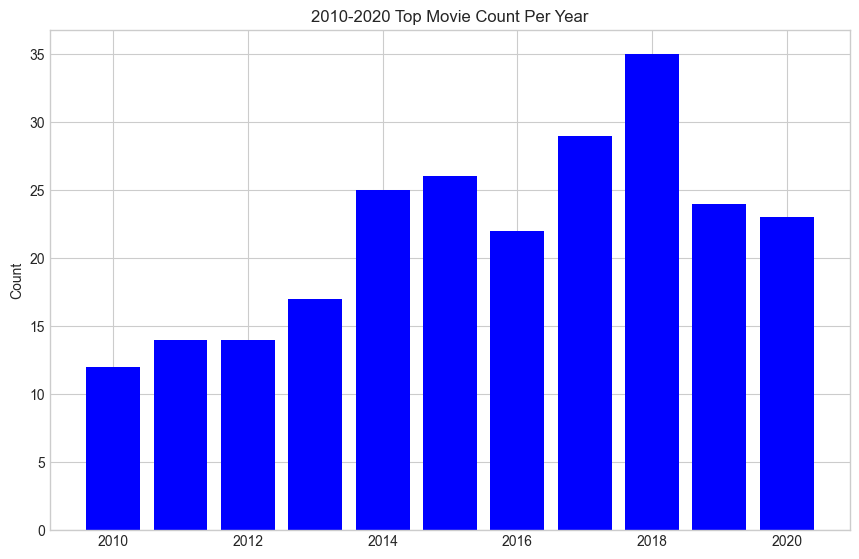

In [29]:
import json
# open username and password from another file.
with open('C:\\Users\\xianx\\Documents\\xianw_secret.json') as f:
      data = json.load(f)
      username = data['username']
      password = data['password']
#print (username+" :" +password)

# import pyodbc
import pyodbc

# setup connection to SQLserver, with specific credentials
connection=pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=LAPTOP-8VUQJOSL;"
                          "DATABASE=python_movies;"
                          "Trusted_Connection=Yes;"
                          "UID="+username+";"
                          "PWD="+password)
cursor=connection.cursor()
  
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

cursor.execute('select count(Score), year(ReleaseDate) from [dbo].[MetacriticMovies] where score>85 group by year(ReleaseDate)')
data=cursor.fetchall()
count=[]
years=[]

for row in data:
     count.append(row[0])
     years.append(row[1])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,count,color = 'b')

plt.gca().set(title='2010-2020 Top Movie Count Per Year',ylabel='Count');